# Exploring Kinoeva Data

Reference: https://python-graph-gallery.com/

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# style
sns.set()

from utils import read_kinoeva
%matplotlib inline

In [2]:
df = read_kinoeva('data/2/CFF Demo_ Underhand Vertical Med Ball Throw.txt')
df.head()

,X,Y,Original_timestamp
T,,,
00:00:00,0.0,0.0,0:00:00:00
00:00:00.030000,1.0,9.0,0:00:00:03
00:00:00.060000,2.0,20.0,0:00:00:06
00:00:00.100000,3.0,34.0,0:00:00:10
00:00:00.130000,5.0,48.0,0:00:00:13


In [3]:
# We can do two time series plots
# Adapting this example: https://python-graph-gallery.com/122-multiple-lines-chart/

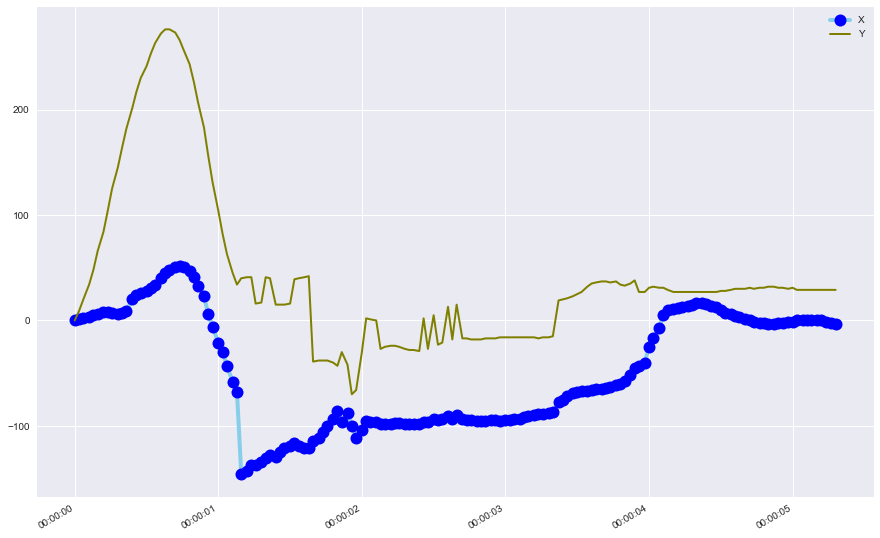

In [4]:
fig, ax = plt.subplots(figsize=(15, 10))

# easier to view as timestamps
timestamps = pd.to_datetime(df.index.values)

# only show hh::mm::ss
ax.xaxis.set_major_formatter(DateFormatter("%H:%M:%S"))

# plot both series
ax.plot(timestamps, df.X, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
ax.plot(timestamps, df.Y, marker='', color='olive', linewidth=2)

ax.legend()

# nicer looking dates
fig.autofmt_xdate()
plt.show()

# Multiple Trajectories

The example above shows a single trajectory (ball).  

Next, let's explore multiple trajectories, with the final goal of modeling relationships between them.

Note: Kinovea saves all trajectories to 1 big text file. The multiple text files are then created by manually splitting into separate files.

In [8]:
df_ball = read_kinoeva('data/3/CFF Demo_ Underhand Vertical Med Ball Throw_Ball.txt')
df_ball.head()

,X,Y,Original_timestamp
T,,,
00:00:00,0.0,0.0,0:00:00:00
00:00:00.030000,0.0,7.0,0:00:00:03
00:00:00.060000,2.0,16.0,0:00:00:06
00:00:00.100000,3.0,27.0,0:00:00:10
00:00:00.130000,5.0,40.0,0:00:00:13


In [9]:
df_elbow = read_kinoeva('data/3/CFF Demo_ Underhand Vertical Med Ball Throw_Elbow.txt')
df_elbow.head()

,X,Y,Original_timestamp
T,,,
00:00:00,0.0,0.0,0:00:00:00
00:00:00.030000,0.0,6.0,0:00:00:03
00:00:00.060000,0.0,13.0,0:00:00:06
00:00:00.100000,0.0,22.0,0:00:00:10
00:00:00.130000,-1.0,32.0,0:00:00:13


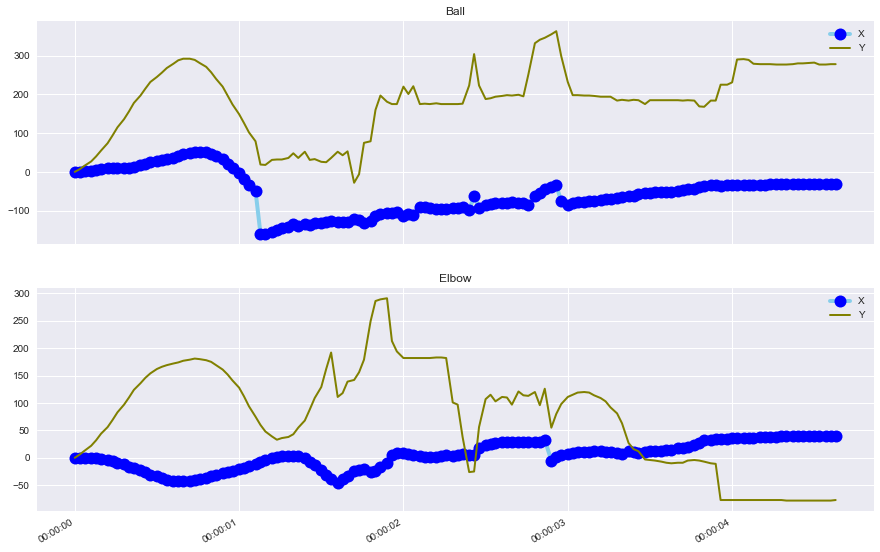

In [14]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
axs = axs.flatten()

timestamps = pd.to_datetime(df_ball.index.values)

# only show hh::mm::ss
axs[0].xaxis.set_major_formatter(DateFormatter("%H:%M:%S"))

# plot
axs[0].set_title('Ball')
axs[0].plot(timestamps, df_ball.X, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
axs[0].plot(timestamps, df_ball.Y, marker='', color='olive', linewidth=2)
axs[0].legend()

axs[1].set_title('Elbow')
axs[1].plot(timestamps, df_elbow.X, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
axs[1].plot(timestamps, df_elbow.Y, marker='', color='olive', linewidth=2)
axs[1].legend()

# nicer looking dates
fig.autofmt_xdate()
plt.show()